INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


TypeError: 'module' object is not callable

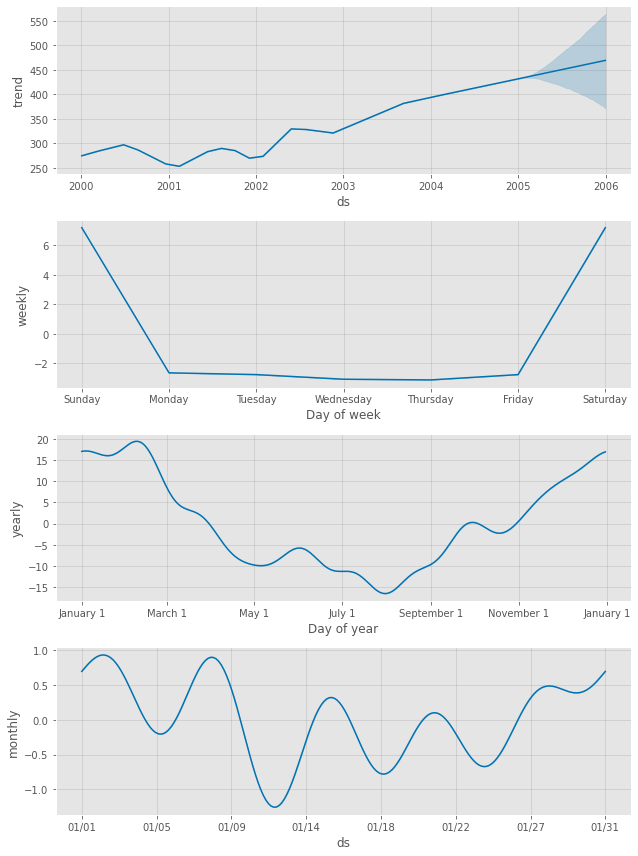

In [6]:
import matplotlib as plt
import pandas as pd
import seaborn as sns
import quandl
from fbprophet import Prophet
# 輸入QUANDL的Key 
QUANDL_KEY = 'oRxsTjFPffWbcymv53DY'
quandl.ApiConfig.api_key = QUANDL_KEY
df = quandl.get(dataset='WGC/GOLD_DAILY_USD',
                start_date='2000-01-01',
                end_date='2005-12-31')

df.reset_index(drop=False, inplace=True)
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)
train_indices = df.ds.apply(lambda x: x.year).values < 2005
df_train = df.loc[train_indices].dropna()
df_test = df.loc[~train_indices].reset_index(drop=True)
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_prophet.fit(df_train)
df_future = model_prophet.make_future_dataframe(periods=365)
df_pred = model_prophet.predict(df_future)

model_prophet.plot_components(df_pred)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Date'>

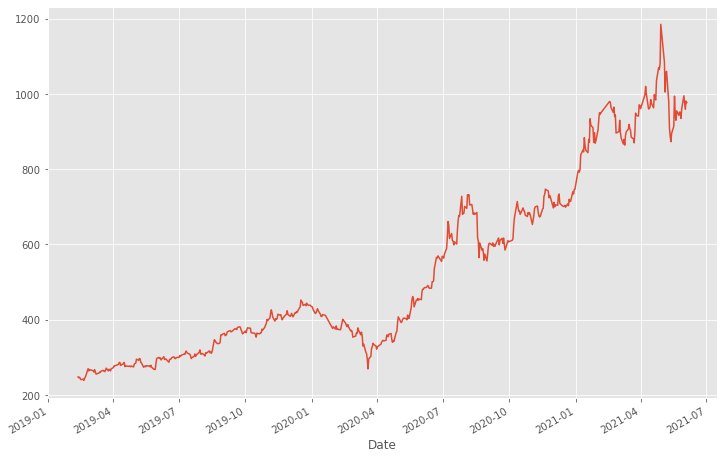

In [1]:
#繪製收盤價
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
import yfinance as yf
df_MTK = yf.download('2454.TW', 
                       start='2019-02-01', 
                       progress=False)
plt.style.use('ggplot')
df_MTK['Adj Close'].plot(figsize=(12, 8))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


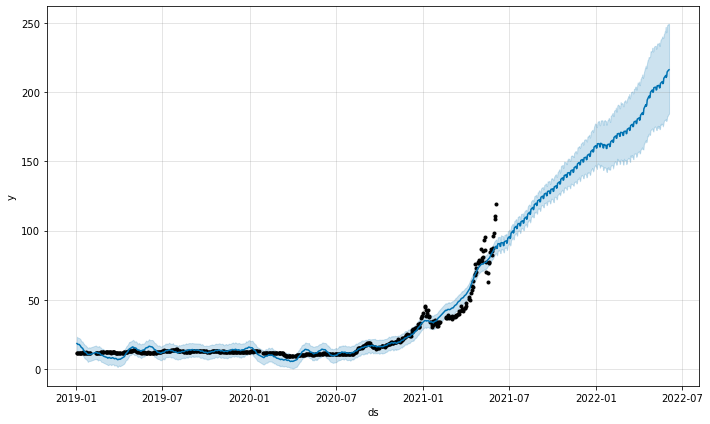

In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
from fbprophet import Prophet
from sklearn import metrics
import yfinance as yf
df_2603 = yf.download('2603.TW', 
                       start='2019-01-01', 
                       progress=False)

new_df_2603 = pd.DataFrame(df_2603['Adj Close']).reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
# 定義模型
model = Prophet()
# 訓練模型
model.fit(new_df_2603)
# 建構預測集
future = model.make_future_dataframe(periods=365) #forecasting for 1 year from now.
# 進行預測
forecast = model.predict(future)

figure=model.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


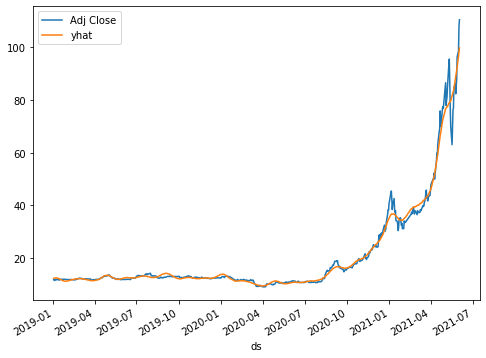

In [21]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
from fbprophet import Prophet
from sklearn import metrics
import yfinance as yf
df_2603 = yf.download('2603.TW', 
                       start='2019-01-01', 
                       progress=False)

new_df_2603 = pd.DataFrame(df_2603['Adj Close']).reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
new_df_2603['y'] = np.log(new_df_2603['y'])
# 定義模型
model = Prophet()
# 訓練模型
model.fit(new_df_2603)
# 建構預測集
future = model.make_future_dataframe(periods=365) #forecasting for 1 year from now.
# 進行預測
forecast = model.predict(future)

df_2603_close = pd.DataFrame(df_2603['Adj Close'])
two_years = forecast.set_index('ds').join(df_2603_close)
two_years = two_years[['Adj Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(1000)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)
two_years[['Adj Close', 'yhat']].plot(figsize=(8, 6));

In [23]:
two_years_AE = (two_years.yhat - two_years['Adj Close'])
two_years_AE.describe()

count    582.000000
mean      -0.084780
std        2.156433
min      -16.664156
25%       -0.452099
50%        0.014318
75%        0.556677
max       18.564952
dtype: float64

In [24]:
print ("MSE:",metrics.mean_squared_error(two_years.yhat, two_years['Adj Close']))
print ("MAE:",metrics.mean_absolute_error(two_years.yhat, two_years['Adj Close']))

MSE: 4.649402968893637
MAE: 1.0306130200845744


Text(0.5, 0, 'Date')

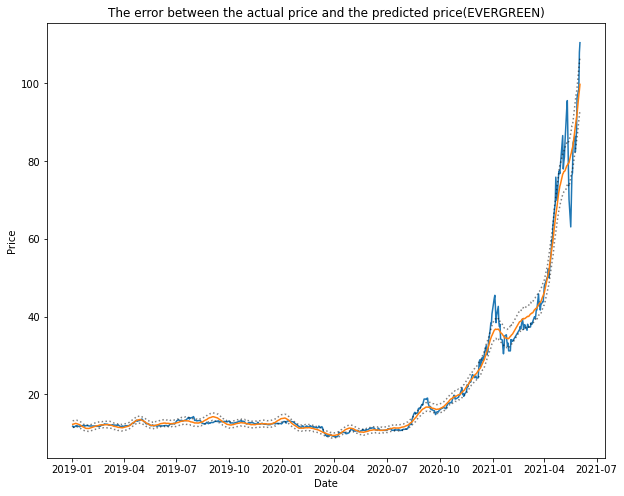

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(two_years['Adj Close'])
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('The error between the actual price and the predicted price(EVERGREEN)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')